# Visualizing Earnings Based on College Majors

In this project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations. We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

 * Rank - Rank by median earnings (the dataset is ordered by this column).
 * Major_code - Major Code.
 * Major_category - Category of major.
 * Total - Total number of people with major.
 * Sample_size - Sample size (unweighted) of full-time.
 * Men - Male graduates.
 * Women - Female graduates.
 * ShareWomen - Women as share of total.
 * Employed - Number employed.
 * Median - Median salary of full-time, year-round workers.
 * Low_wage_jobs - Number in low-wage service jobs.
 * Full_time - Number employed 35 hours or more.
 * Part_time - Number employed less than 35 hours.
 
Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [3]:
# Load the data with pandas
recent_grads = pd.read_csv('recent-grads.csv')
# Print the first observation of our dataset
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# Print the first five elements of the dataset
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
# Print the last five elements of the dataset
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# Get summary statistics of our dataset. It often helps to identify potential outliers
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
# Get the number of rows (number of majors) of the dataset
raw_data_count = len(recent_grads)
raw_data_count

173

In [8]:
# We decide to remove null values
recent_grads = recent_grads.dropna()

In [9]:
# Get the updated number of rows (number of Majors)
cleaned_data_count = len(recent_grads)
cleaned_data_count

172

We went from 173 to 172 rows. Therefore only one row contained null values. This is the row we have removed.

In [10]:
# Get the summary statistics one more time
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Let's try to get some insights by creating a few visualizations.

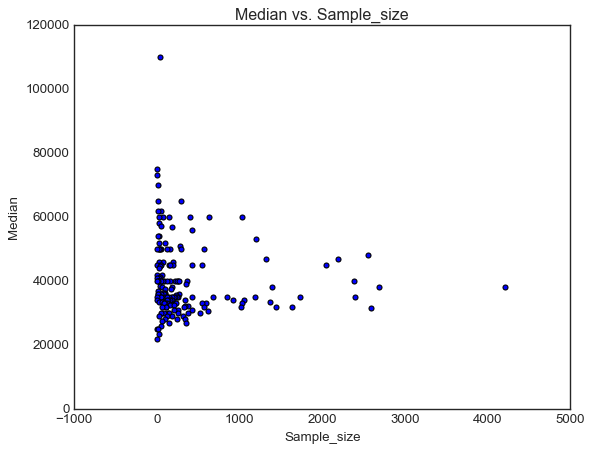

In [32]:
# Create a scatter plot between 'Sample_size' and 'Median'
plt.style.use('seaborn-white')
ax1 = recent_grads.plot(x='Sample_size', y='Median', 
                        kind='scatter', 
                        title='Median vs. Sample_size')


ax1 (Median vs Sample_size) helps us to visualize the connection between the median salary and the sample_size of the field. There is a poor correlation between these two variables. We can't say that students in more popular majors make more money.

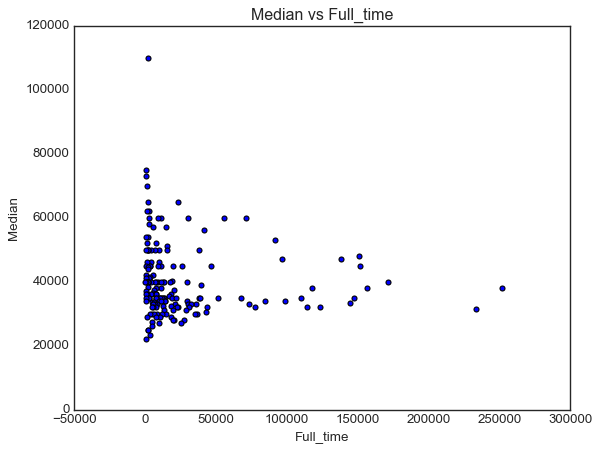

In [33]:
# Create a scatter plot between 'Full_time' and 'Median'

ax2 = recent_grads.plot(x='Full_time', y='Median', kind='scatter', 
                       title='Median vs Full_time')

ax2 (Median vs Full_time) shows a poor correlation between the median salary and the number full_time employees in a particular field.

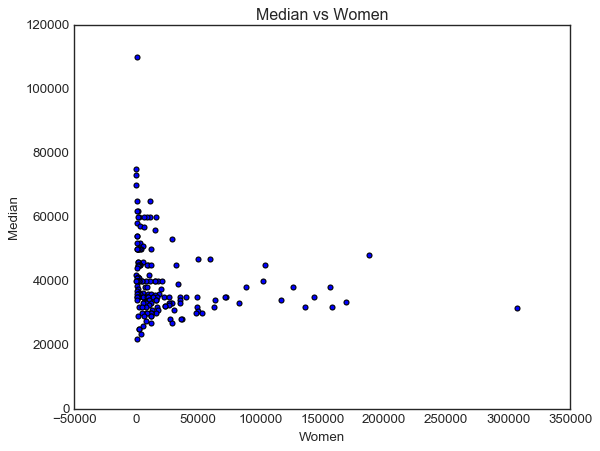

In [34]:
# Create a scatter plot between 'Women' and 'Median'

ax3 = recent_grads.plot(x='Women', y='Median', kind='scatter', 
                       title='Median vs Women')

ax3 (Median vs Women) shows a poor correlation between the number of women in a field and the median salary. Therefore, it would be wrong to say that the students that majored in subjects that were majority female make more money.

Let's explore the distribution of the following columns:
- Median
- Employed
- Full_time
- ShareWomen
- Unemployment_rate


(0, 55)

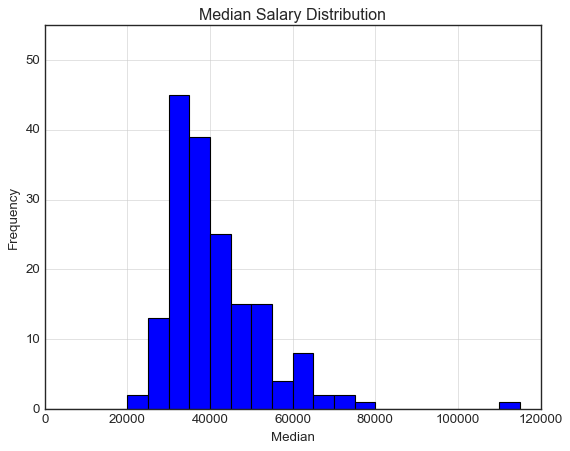

In [36]:
# Create a histogramm for the distribution of the median salary

axx1 = recent_grads['Median'].hist(bins=23, range=(0, 115000))
axx1.set_xlabel("Median")
axx1.set_ylabel("Frequency")
axx1.set_title("Median Salary Distribution")
axx1.set_ylim(0, 55)

The distribution above shows that the majority of the majors have a median salary between 30k-35k (US Dollars).

Text(0.5, 1.0, 'Employed Distribution')

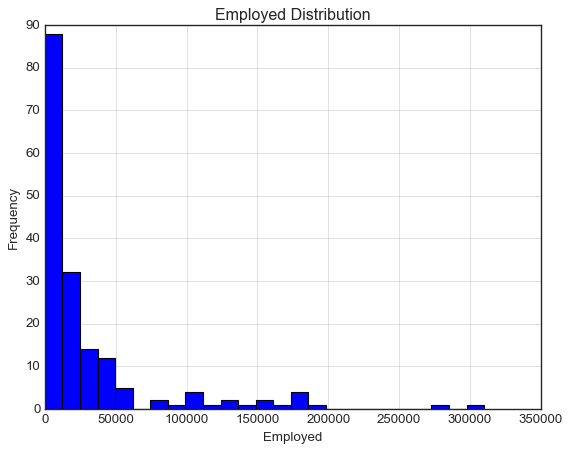

In [37]:
# Create a histrogramm for the distribution of Employed graduates

axx2 = recent_grads['Employed'].hist(bins=25, range=(0, 310000))
axx2.set_xlabel("Employed")
axx2.set_ylabel("Frequency")
axx2.set_title("Employed Distribution")

Most of the majors count less than 12500 employed graduates. A very few ones count above 100000 employed graduates.

Text(0.5, 1.0, 'Full_time Distribution')

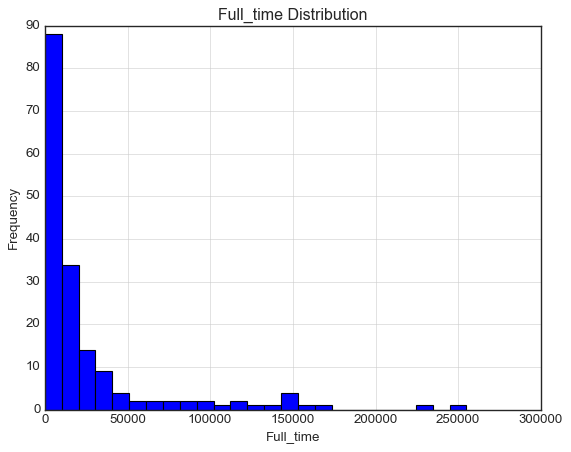

In [39]:
# Create a histrogramm for the distribution of the full_time employed graduates

axx3 = recent_grads['Full_time'].hist(bins=25, range=(0, 255000))
axx3.set_xlabel("Full_time")
axx3.set_ylabel("Frequency")
axx3.set_title("Full_time Distribution")

The majority of the majors count (approximately) less than 11 000 full-time employed graduates. A few ones count more than 50 000 full-time employed graduates.

(0, 100)

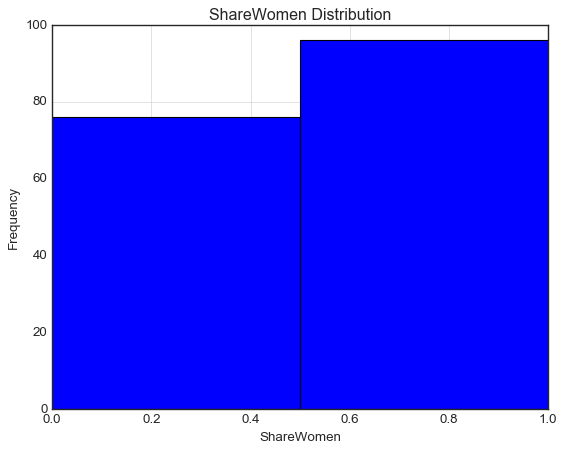

In [40]:
# Create a histogramm for the distribution of the percentage of women
axx4 = recent_grads['ShareWomen'].hist(bins=2, range=(0, 1))
axx4.set_xlabel("ShareWomen")
axx4.set_ylabel("Frequency")
axx4.set_title("ShareWomen Distribution")
axx4.set_ylim(0, 100)

Interesting! The majority of the majors had more female graduates than male ones. When we have a look at the ShareWomen distribution, we see that around 95/172 majors are predominantly female. That is around 55.23% of majors.

(0, 20)

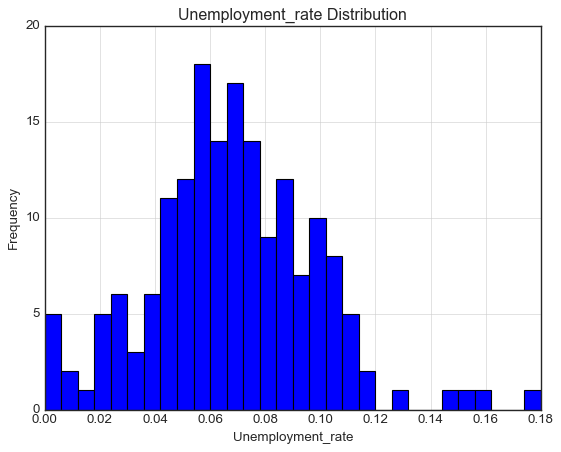

In [41]:
# Create a histogramm for the distribution of the Unemployment rate

axx5 = recent_grads['Unemployment_rate'].hist(bins=30,
                                              range=(0, 0.180))
axx5.set_xlabel("Unemployment_rate")
axx5.set_ylabel("Frequency")
axx5.set_title("Unemployment_rate Distribution")
axx5.set_ylim(0, 20)

This distribution looks a little like a normal distribution. A wide range of values are between 5% and 8 %. There is a major with around 18 % unemployment rate. Maybe high school students should avoid this choice, unless they are really passionate about the subject. 

Now we will use a scatter matrix to visualize multiple graphs simultaneously.

In [44]:
# Import scatter_matrix from pandas.plotting

from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000096F87F0>,
      dtype=object)

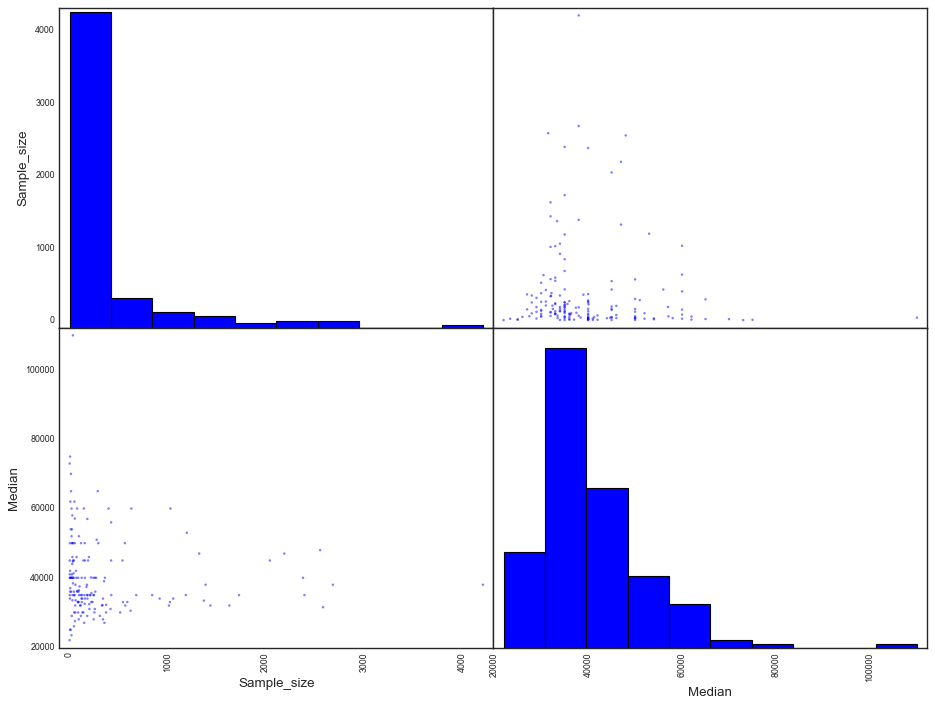

In [45]:
# We create a figure (weight = 14 inch, height = 10 inch)
# We plot a scatter matrix on the figure to see the different correlations between Sample_size and Median

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=
              (14,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06b2dfc6d8>,
      dtype=object)

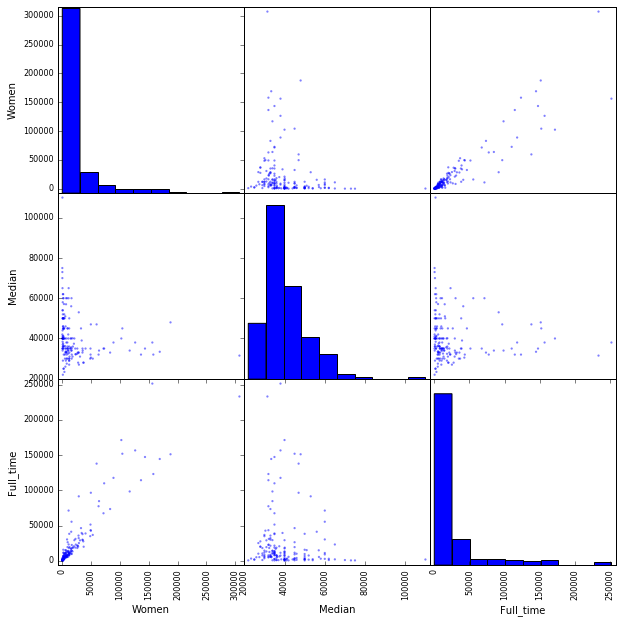

In [27]:
scatter_matrix(recent_grads[['Women', 'Median', 'Full_time']], 
              figsize=(10,10))

In this exercise, we decided to use the scatter matrix mainly to show the possibilities it offers. The observations we can make are the same we did with a simple scatter plot. The only difference is that, with scatter_matrix, we get multiple scatter plots on the same figure, with the possibility to do more comparisons. 


We will now use bar plots to get even more insights from the datas.

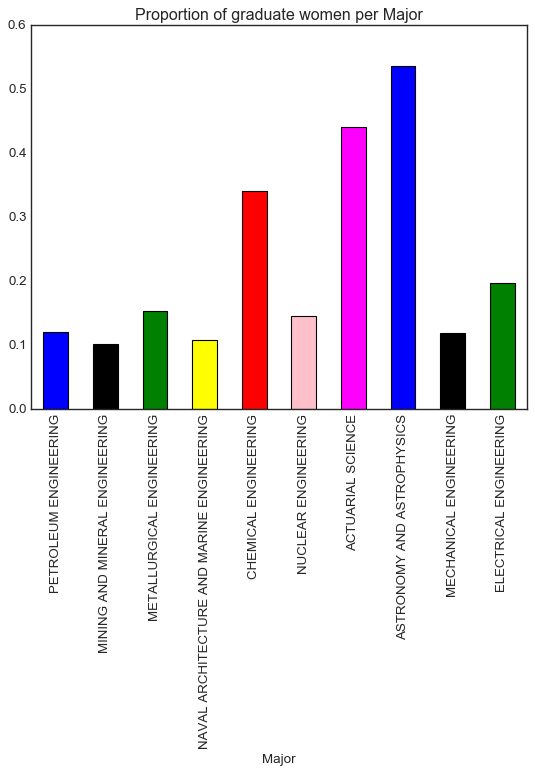

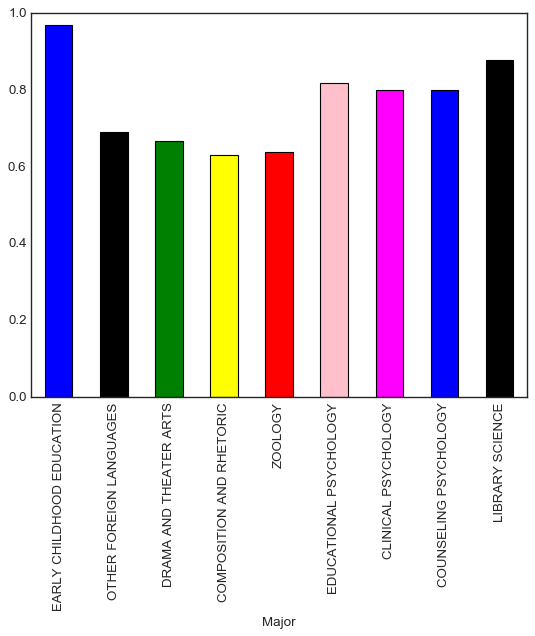

In [65]:
c = ['blue', 'black', 'green', 'yellow', 'red', 'pink', 'magenta']

# Create a visualization to compare ShareWomen across the first 10 majors

axx9 = recent_grads[:10].plot.bar(x='Major', y='ShareWomen',
                           legend=False, color=c)
axx9.set_title('Proportion of graduate women per Major')
# Create a visualization to compare ShareWomen across the last 10 majors

recent_grads[163:].plot.bar(x='Major', y='ShareWomen', 
                            legend=False, color=c)

From the first 10 majors, women tend to mainly graduate from 'Astronomy and Astrophysics'. Less women graduate from 'Mining and Mineral Engineering'. The last 10 majors are more uniform when it comes to the percentage of graduate women. The major 'Early Childhood Education' gets the highest percentage though.

Text(0.5, 1.0, 'Unemployment_rate for each Major')

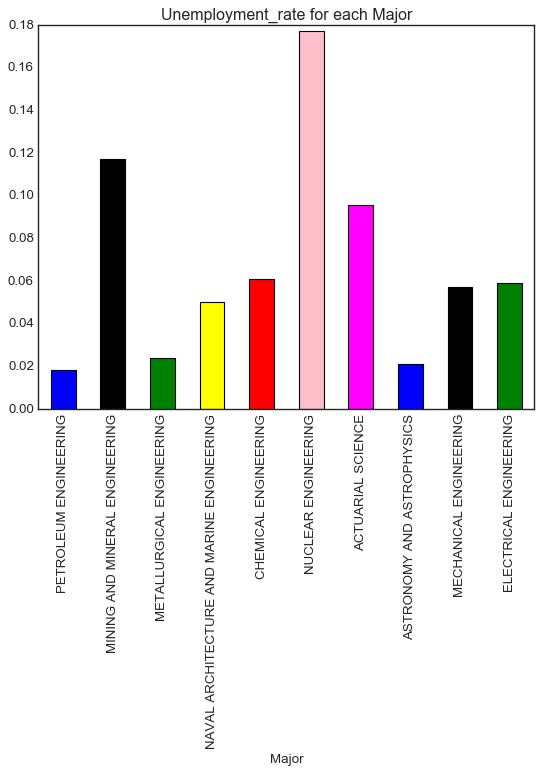

In [66]:
# Create a visualization to compare the Unemployment rate across the first 10 majors

axx10 = recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', 
                           legend=False, color=c)
axx10.set_title("Unemployment_rate for each Major")

Wow! The nuclear engineering degree suffers from a pretty high unemployment rate, in comparison to other fields like Petroleum Engineering. Hence, Petroleum Engineering seems to be a very good option for those who want to get better chances of getting hired after graduation.

Text(0.5, 1.0, 'Unemployment rate for each Major')

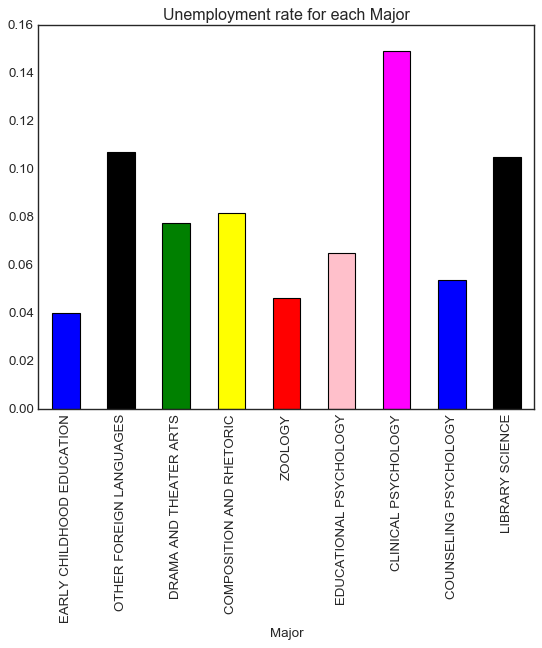

In [67]:
axx11 = recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', 
                            legend=False, color=c)
axx11.set_title("Unemployment rate for each Major")

Among the last 10 majors, Clinical Psychology is the one with the highest unemployment rate. Considering 'Early Childhood Education' might be a better option.